## Time Series With Pandas

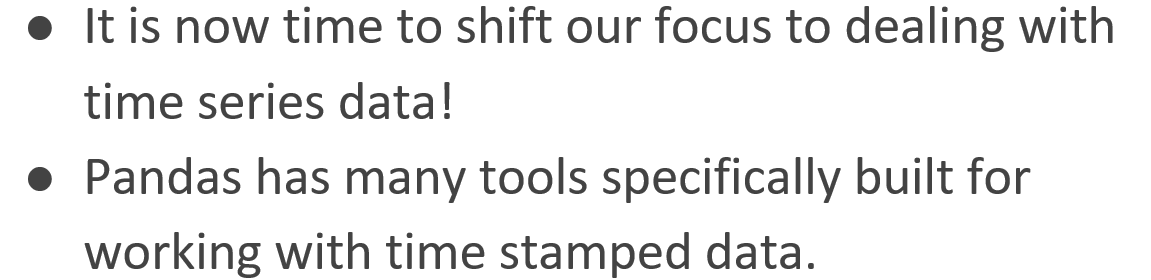
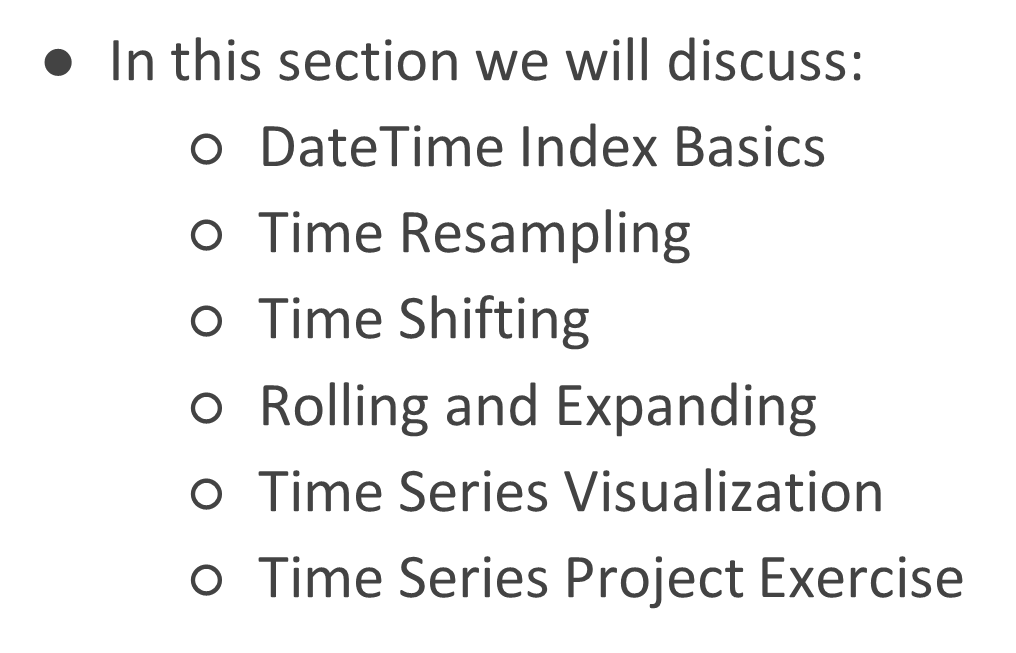

### Datetime Index -Part 1

In [1]:
from datetime import datetime

In [2]:
my_year=2024
my_month=2
my_day=4
my_hour=12
my_min=40
my_sec=10

datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])

In [3]:
my_date = datetime(my_year, my_month,my_day)

In [4]:
my_date

datetime.datetime(2024, 2, 4, 0, 0)

In [5]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)

In [6]:
my_date_time

datetime.datetime(2024, 2, 4, 12, 40, 10)

In [7]:
my_date_time.day

4

In [8]:
type(my_date_time)

datetime.datetime

In [9]:
import numpy as np

In [10]:
np.array(['2020-03-15','2020-01-16','2020-03-17'])

array(['2020-03-15', '2020-01-16', '2020-03-17'], dtype='<U10')

In [11]:
np.array(['2020-03-15','2020-01-16','2020-03-17'],dtype='datetime64')

array(['2020-03-15', '2020-01-16', '2020-03-17'], dtype='datetime64[D]')

D-NUMPY HAS DATELEVEL PRECISION

In [12]:
np.array(['2020-03-15','2020-01-16','2020-03-17'],dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [13]:
np.array(['2020-03-15','2020-01-16','2020-03-17'],dtype='datetime64[M]')

array(['2020-03', '2020-01', '2020-03'], dtype='datetime64[M]')

In [14]:
np.array(['2020-03-15','2020-01-16','2020-03-17'],dtype='datetime64[h]')

array(['2020-03-15T00', '2020-01-16T00', '2020-03-17T00'],
      dtype='datetime64[h]')

In [15]:
# T00
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [16]:
np.arange('2018-06-01','2018-06-23',7,dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [17]:
np.arange('1968','1976',dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [18]:
np.arange('2018-06-01','2019-06-23',dtype='datetime64[M]')

array(['2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
       '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05'],
      dtype='datetime64[M]')

###  Datetime Index -Part 2

In [19]:
import pandas as pd

In [20]:
pd.date_range('2020-01-01',periods=7,freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range('Jan 01, 2018',periods=7,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

for non US data, how pandas will get to know day or month e.g 1/2/2018

In [23]:
pd.to_datetime(['1/2/2018','1/3/2018'])# m-d-y

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [24]:
pd.to_datetime(['2/1/2018','3/1/2018'])# m-d-y

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [25]:
pd.to_datetime(['2/1/2018','3/1/2018'], format='%d/%m/%Y')# d-m-y

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [26]:
pd.to_datetime(['2--1--2018','3--1--2018'], format='%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [27]:
# lets create dataframe

In [28]:
data=np.random.randn(3,2)
cols=['A','B']
print(data)

[[ 1.03503862 -0.39840391]
 [ 0.5666093   0.65249122]
 [-0.20404692 -0.92518496]]


In [29]:
idx = pd.date_range('2020-01-01',periods=3,freq='D')

df = pd.DataFrame(data,index=idx ,columns=cols)

In [30]:
df

,A,B
2020-01-01,1.035039,-0.398404
2020-01-02,0.566609,0.652491
2020-01-03,-0.204047,-0.925185


In [31]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [32]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [33]:
df.index.argmax() # indx location will show

2

In [34]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [35]:
df.index.argmin() # indx location will show

0

### Time Resampling

In [36]:
pwd

'D:\\TSA\\04-Time Series With Pandas'

In [37]:
df=pd.read_csv("D:\TSA\Data\starbucks.csv")

In [38]:
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [39]:
df=pd.read_csv("D:\TSA\Data\starbucks.csv",index_col='Date')

In [40]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6+ KB


In [42]:
df.index # this is normal index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [43]:
# if we require the datetime index just use "parse_dates=True"

In [44]:
df=pd.read_csv("D:\TSA\Data\starbucks.csv",index_col='Date',parse_dates=True)

In [45]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [46]:
# daily data into yearly
df.resample(rule='A').std() # min,max,sum,std,mean

,Close,Volume
Date,,
2015-12-31,6.076922,4.093368e+06
2016-12-31,1.958114,3.936798e+06
2017-12-31,2.415526,4.690972e+06
2018-12-31,4.678178,6.465358e+06


In [47]:
def first_day(entry):
    
    # is there an entry?
    if len(entry) != 0:
        # if so , return first entry
        return entry[0]
    

In [48]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [49]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:xlabel='Date'>

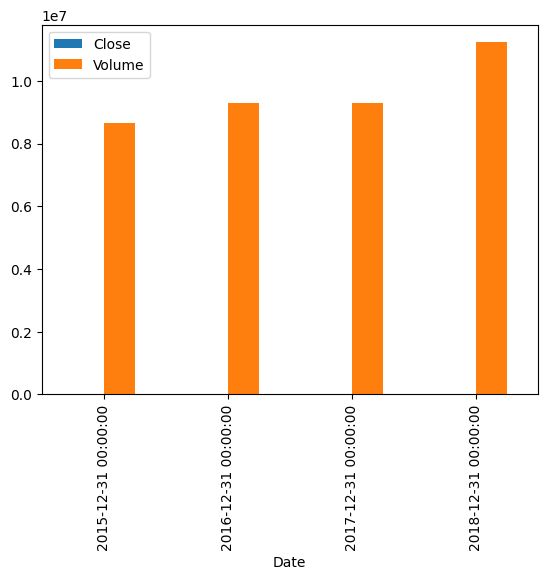

In [50]:
df.resample(rule='A').mean().plot.bar()

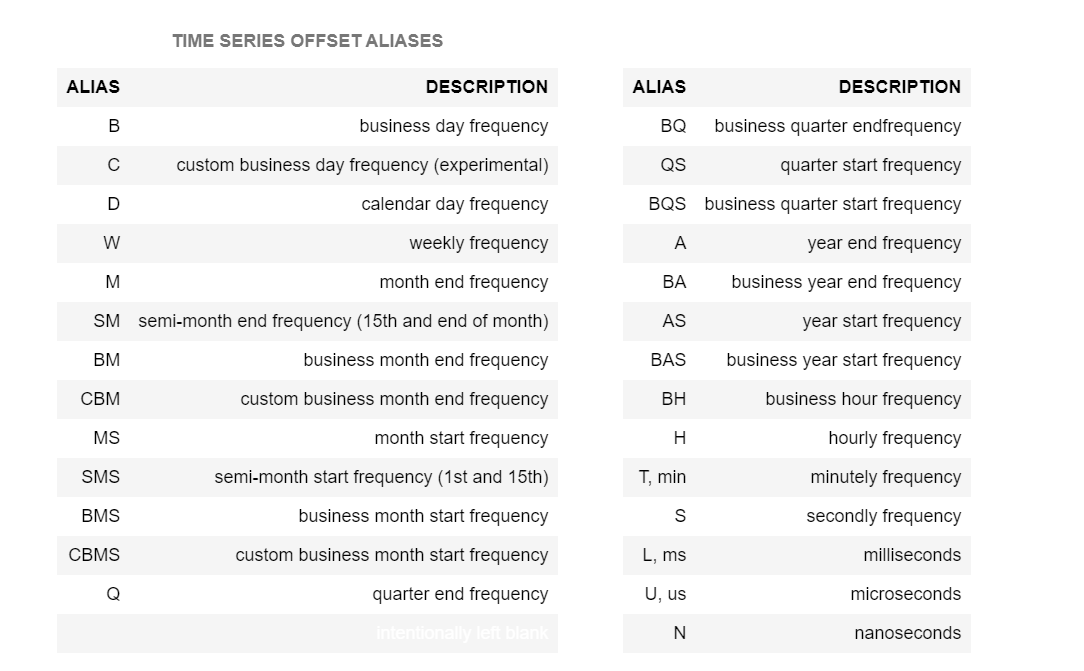

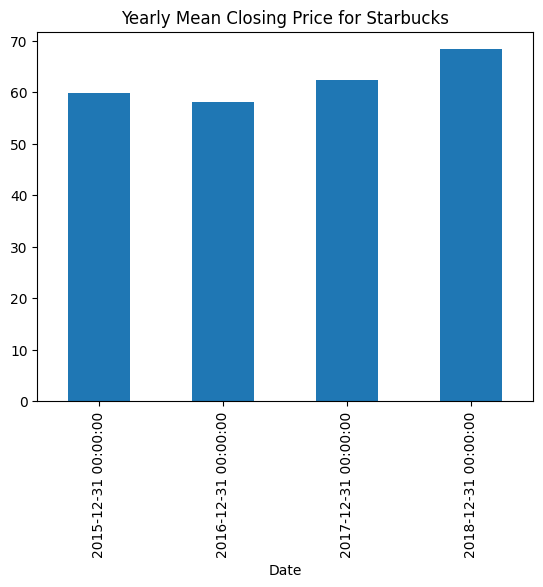

In [51]:
title = 'Yearly Mean Closing Price for Starbucks'
df['Close'].resample('A').max().plot.bar(title=title,color=['#1f77b4']);

### Time Shifting

In [52]:
df=pd.read_csv('D:\TSA\Data\starbucks.csv',index_col='Date',parse_dates=True)

In [53]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [54]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [55]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [56]:
df.shift(1).tail() # we lost info in last rows 

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [57]:
df.shift(-1).tail() # we lost info in first row

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [58]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [59]:
df.shift(periods=1,freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [60]:
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


### Rolling and Expanding
A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a simple moving average. Let's show how to do this easily with pandas!

In [61]:
df=pd.read_csv('D:\TSA\Data\starbucks.csv',index_col='Date',parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:xlabel='Date'>

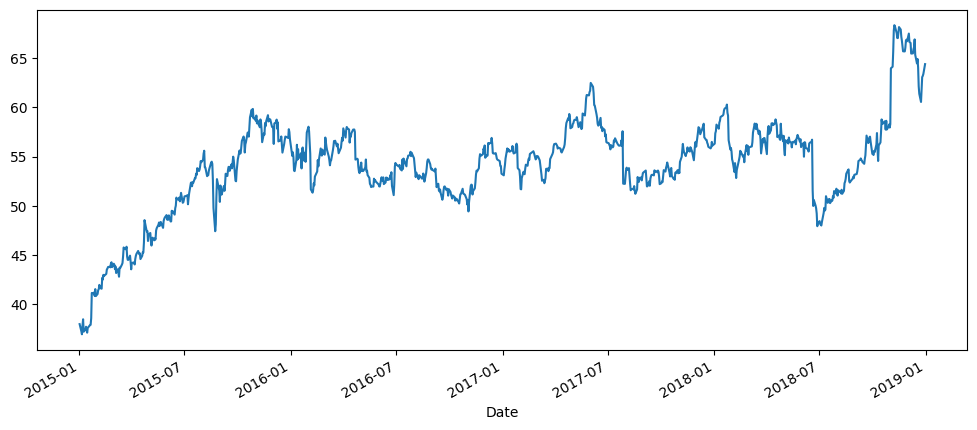

In [62]:
df['Close'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

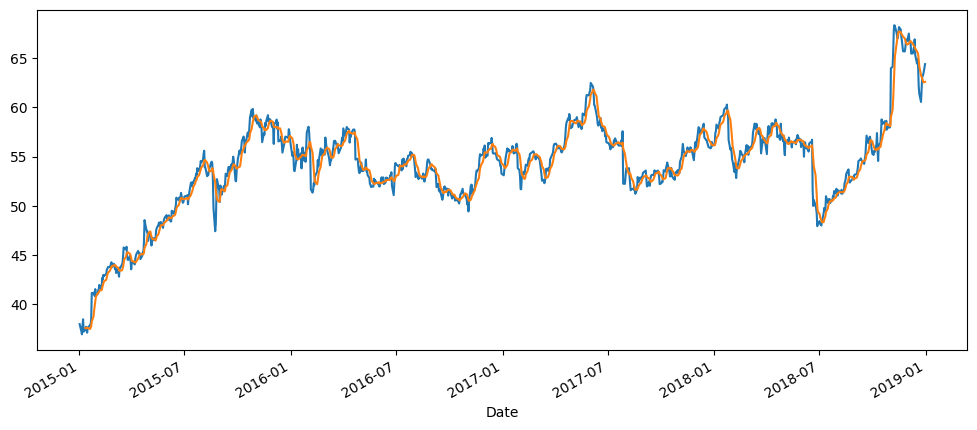

In [63]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=7).mean()['Close'].plot() # first 7 days will not enough info for calculation so cam nan

<AxesSubplot:xlabel='Date'>

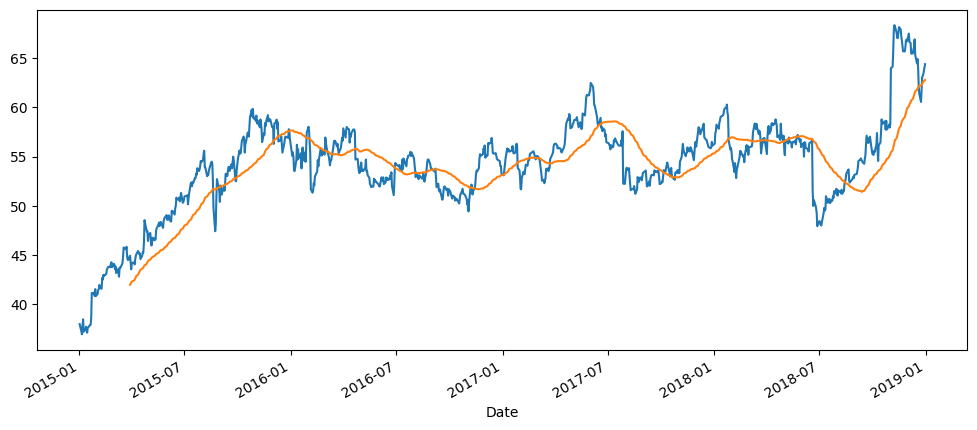

In [64]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Close'].plot() # first 7 days will not enough info for calculation so cam nan

In [65]:
df['Close: 30 Day Mean']=df['Close'].rolling(window=30).mean()

In [66]:
df

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
...,...,...,...
2018-12-24,60.5600,6323252,65.963703
2018-12-26,63.0800,16646238,65.791913
2018-12-27,63.2000,11308081,65.647000


<AxesSubplot:xlabel='Date'>

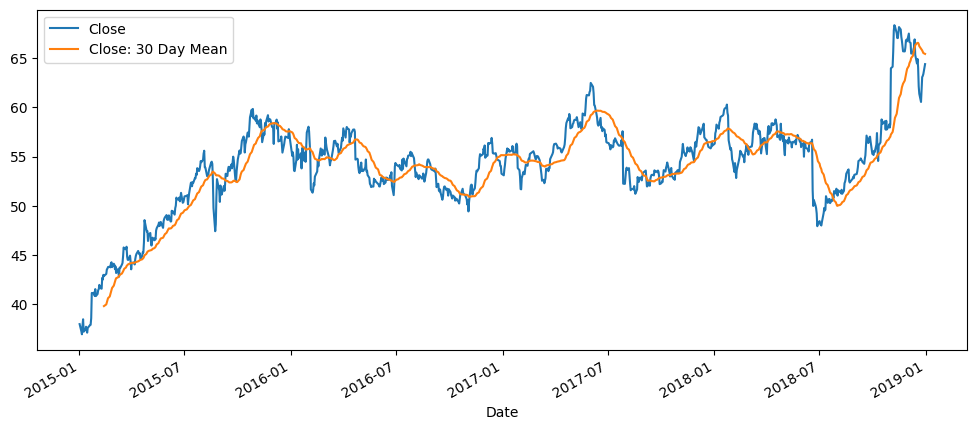

In [67]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5))

#### Expanding
Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

<AxesSubplot:xlabel='Date'>

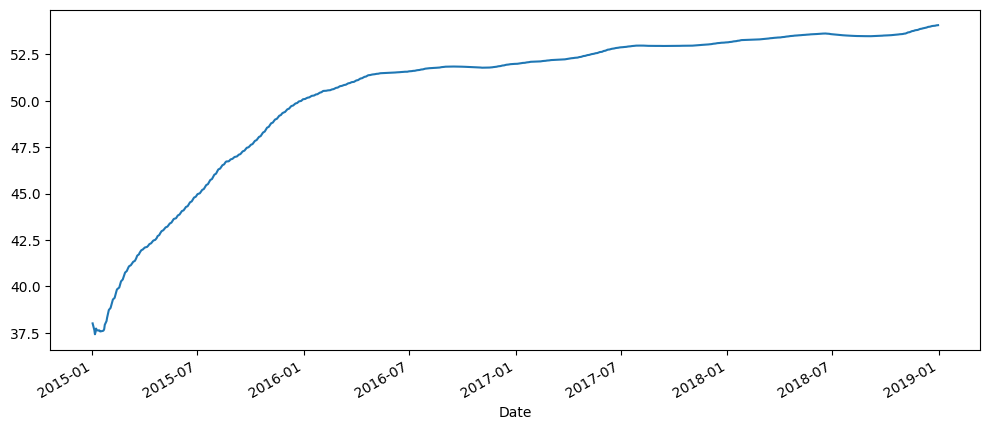

In [68]:
df['Close'].expanding().mean().plot(figsize=(12,5))

### Visualizing Time Series Data

In [69]:
df=pd.read_csv('D:\TSA\Data\starbucks.csv',index_col='Date',parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [70]:
# To show that dates are already parsed
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

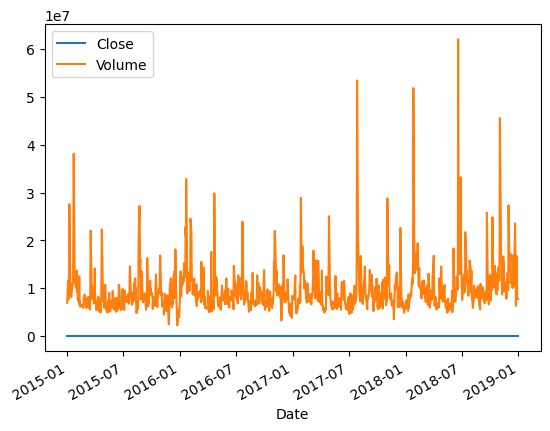

In [71]:
df.plot(); # for plot index must be datetime index

<AxesSubplot:xlabel='Date'>

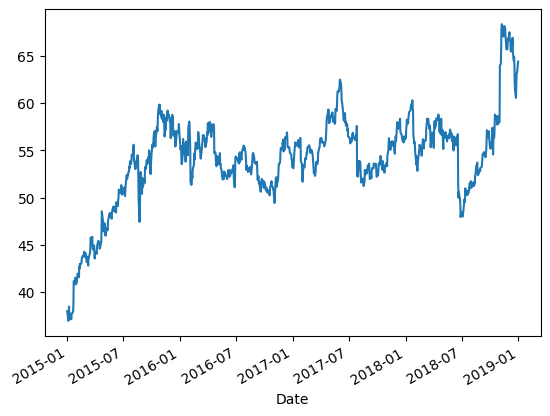

In [72]:
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

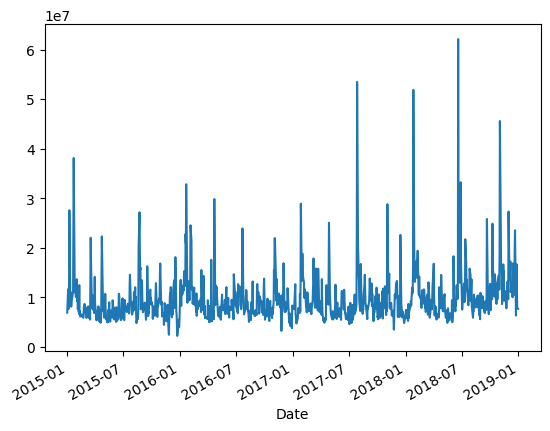

In [73]:
df['Volume'].plot()

#### Plot Formatting : Adding a title and axis labels

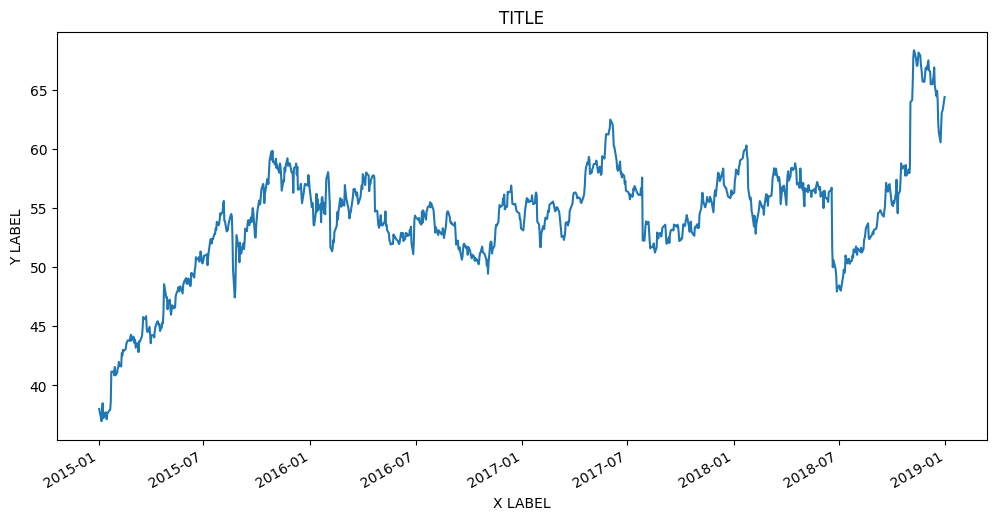

In [76]:
title='TITLE'
ylabel='Y LABEL'
xlabel='X LABEL'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x')
ax.set(xlabel=xlabel, ylabel=ylabel);

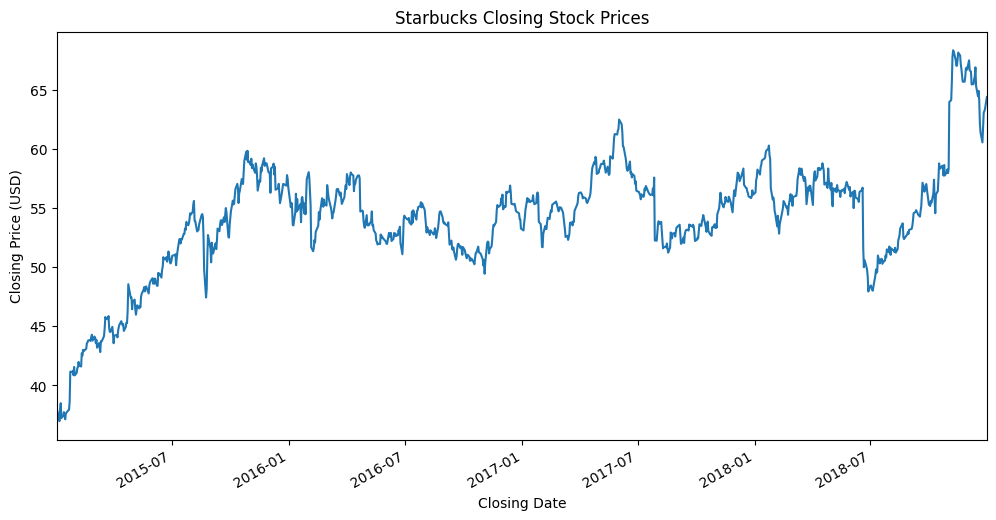

In [75]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

#### X Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into df.plot().

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

<AxesSubplot:xlabel='Date'>

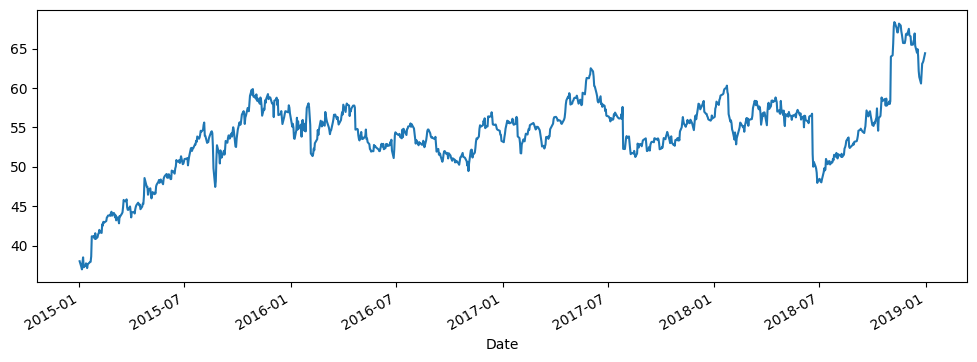

In [83]:
df['Close'].plot(figsize=(12,4),)

###### Choosing X Limits by Slice:

<AxesSubplot:xlabel='Date'>

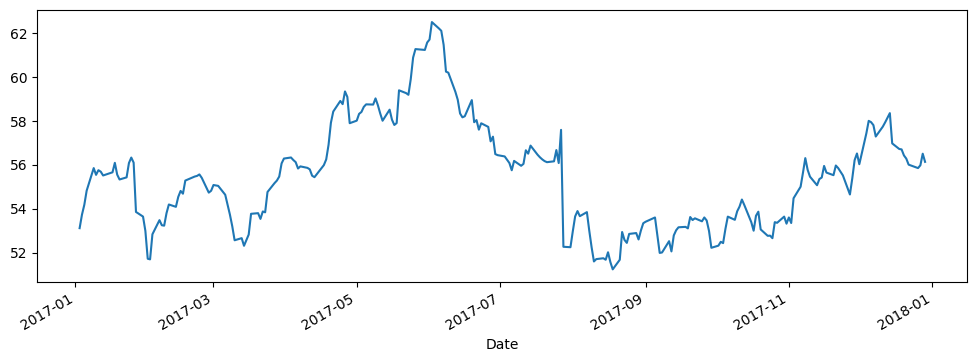

In [82]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4),)

###### Choosing X Limits by Argument:

<AxesSubplot:xlabel='Date'>

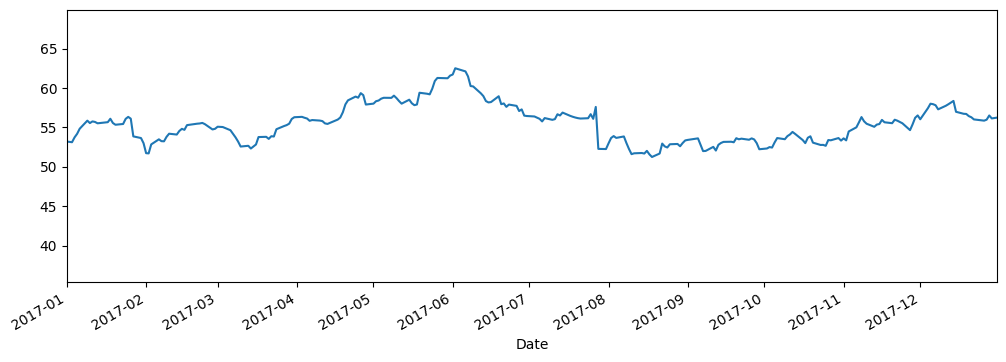

In [87]:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-12-31'])

###### Y Limit

<AxesSubplot:xlabel='Date'>

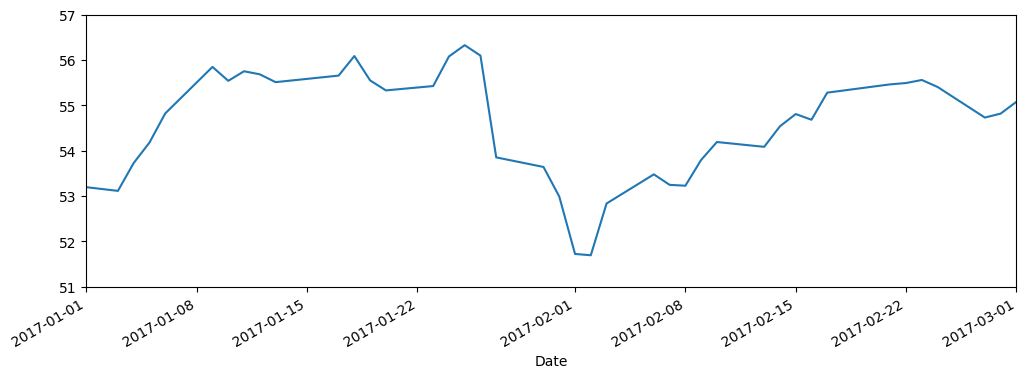

In [90]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[51,57])

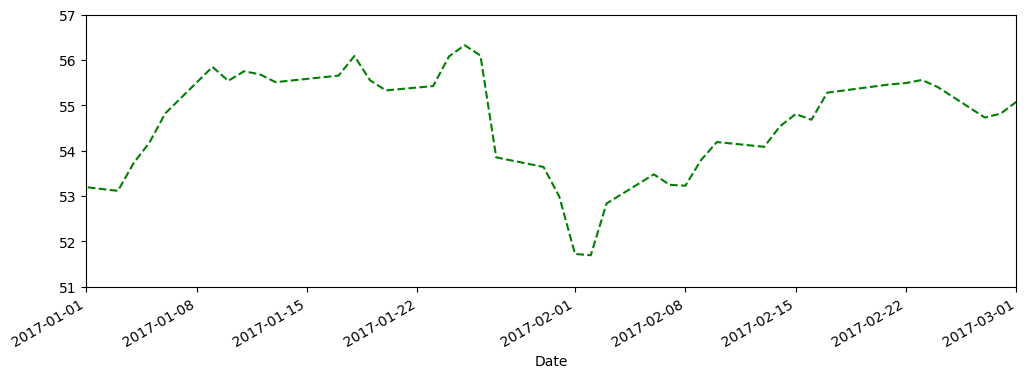

In [91]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='green');

### Visualizing Time Series Data - Part 2

In [92]:
from matplotlib import dates

<AxesSubplot:xlabel='Date'>

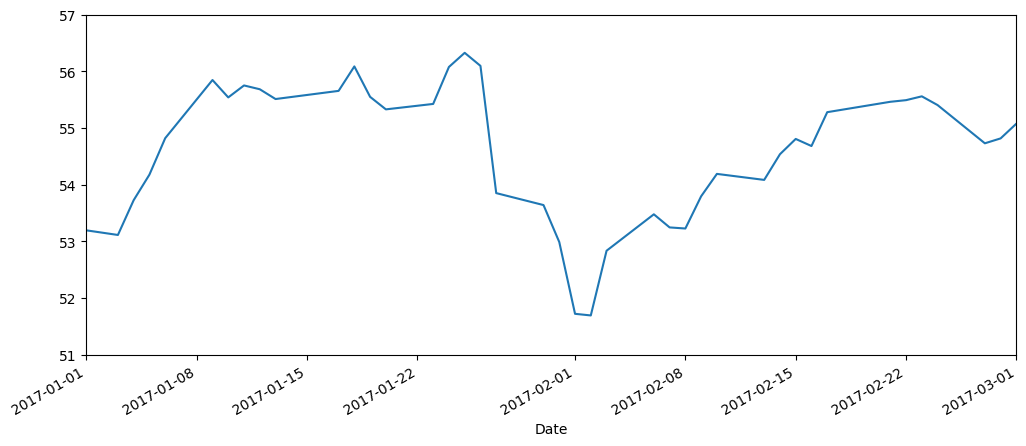

In [96]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],figsize=(12,5))

<AxesSubplot:xlabel='Date'>

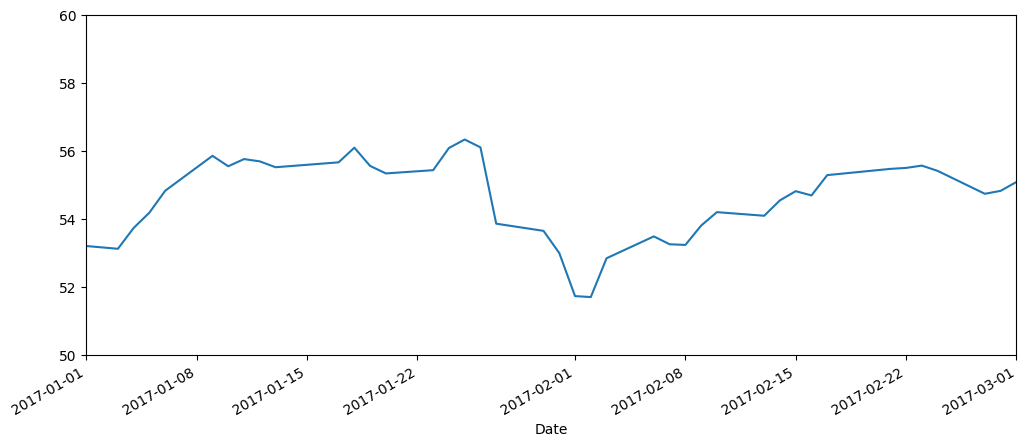

In [99]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))

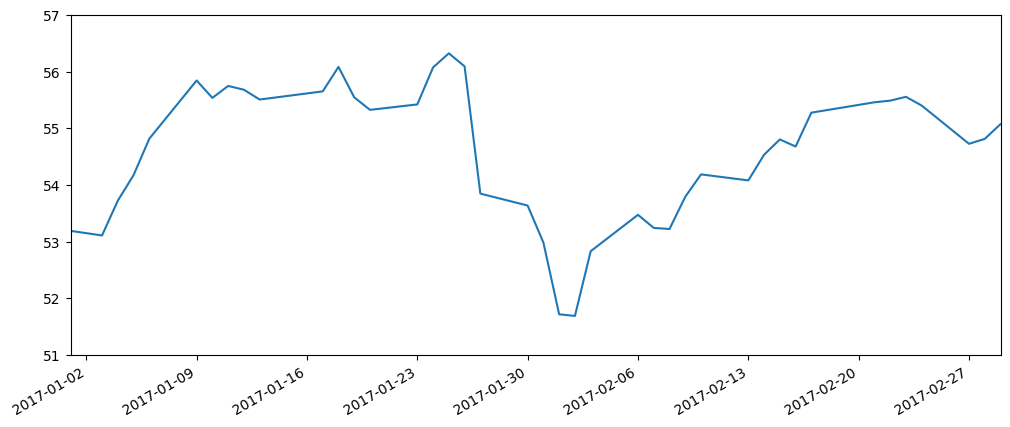

In [100]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

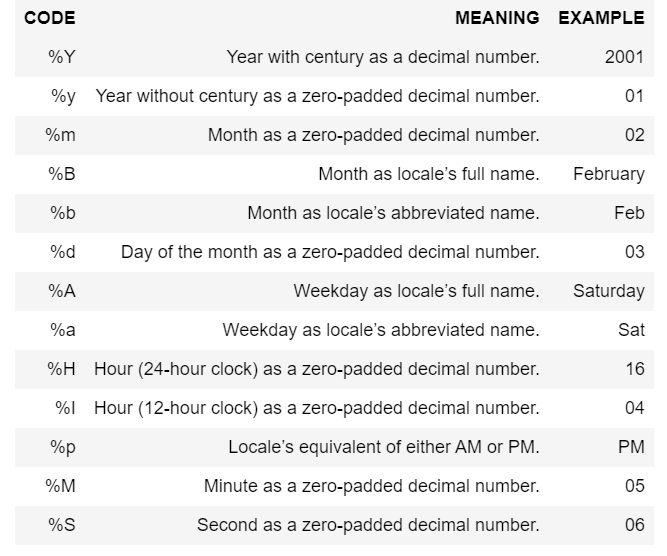
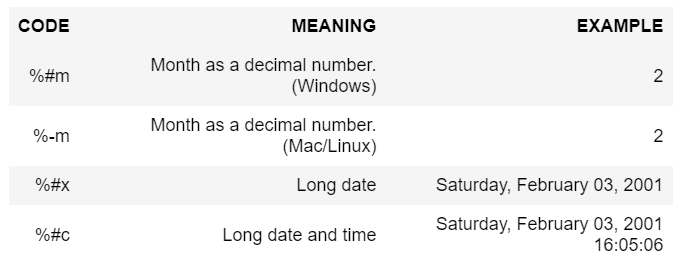

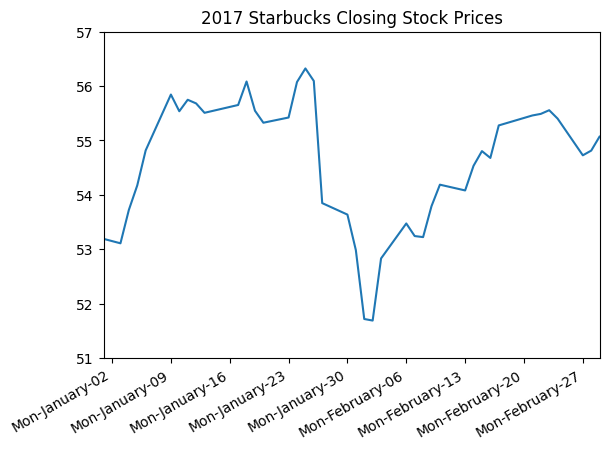

In [101]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

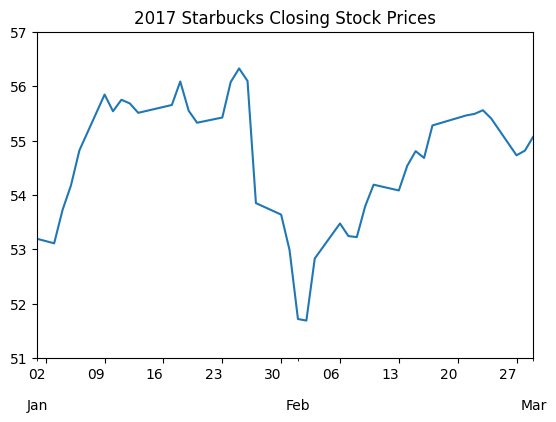

In [102]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

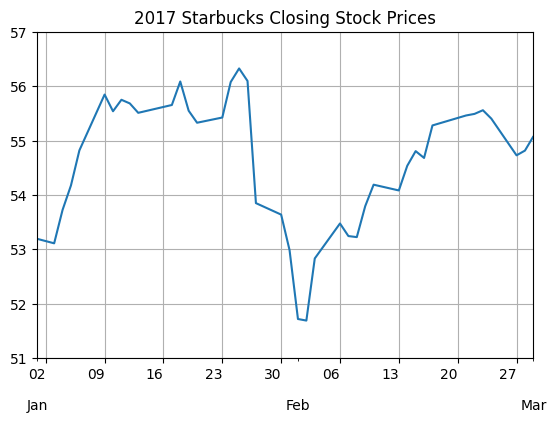

In [103]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)